In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
house = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [5]:
print(f"Rows: {house.shape[0]}")
print(f"Columns: {house.shape[1]}")

Rows: 1460
Columns: 81


In [6]:
# CHECKING NA VALUES
na_cols = house.columns[house.isna().sum()>0] # To get the list of the columns with missing values
print(na_cols)
print()
house[na_cols].isna().sum()

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')



LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
house_num = house.select_dtypes("number")
house_cat = house.select_dtypes("object")

## Handling missing values by imputation

In [8]:
num_na_cols = house_num.columns[house_num.isna().sum()>0]
house_num[num_na_cols].isna().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [9]:
house_num[num_na_cols].nunique()

LotFrontage    110
MasVnrArea     327
GarageYrBlt     97
dtype: int64

In [10]:
summary_na = house_num[num_na_cols].describe()
summary_na.iloc[[0,1,2,5], :]

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
50%,69.000000,0.000000,1980.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


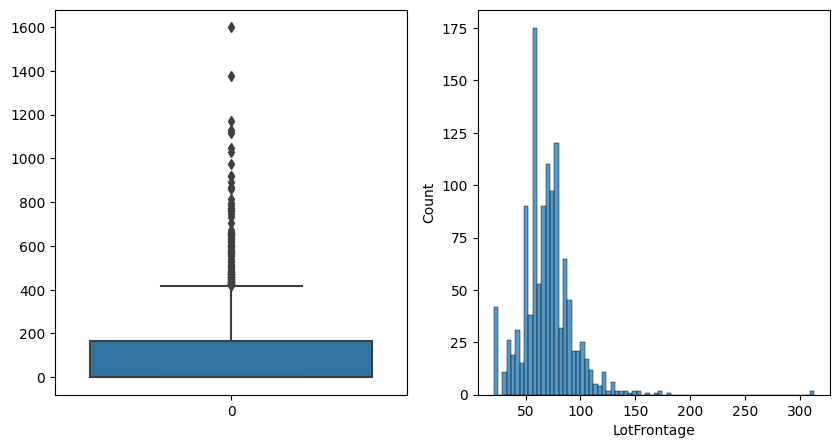

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(house_num["MasVnrArea"], ax=ax[0])
sns.histplot(house_num["LotFrontage"], ax=ax[1])
plt.show()


MasVnrArea (median) There are lots of outliers which skewed the mean <br>
LotFrontage (mean) The distribution is approximately normal <br>
GarageYrBlt (Check if there is order to the data)

In [12]:
house_num["GarageYrBlt"].head() # Data is unordered so we can't do bfill or ffill

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [13]:
house_num["GarageYrBlt"] = house_num["GarageYrBlt"].fillna(house_num["GarageYrBlt"].median())
house_num["MasVnrArea"] = house_num["MasVnrArea"].fillna(house_num["MasVnrArea"].median())
house_num["LotFrontage"] = house_num["LotFrontage"].fillna(house_num["LotFrontage"].mean())

In [14]:
house_num.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# Feature Scaling 

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_hnum = scaler.fit_transform(house_num.iloc[:, 1:])

df_hnum_s = pd.DataFrame(scaled_hnum, columns=house_num.columns[house_num.columns != "Id"])

# test_num_s = scaler.fit_transform(test_num.iloc[:, 1:])
# testnum_df = pd.DataFrame(test_num_s, columns=test_num.columns[test_num.columns != "Id"])

In [16]:
df_hnum_s.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.017598,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.107927,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.934226,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.809167,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.892540,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


In [17]:
corr_num = df_hnum_s.corr()

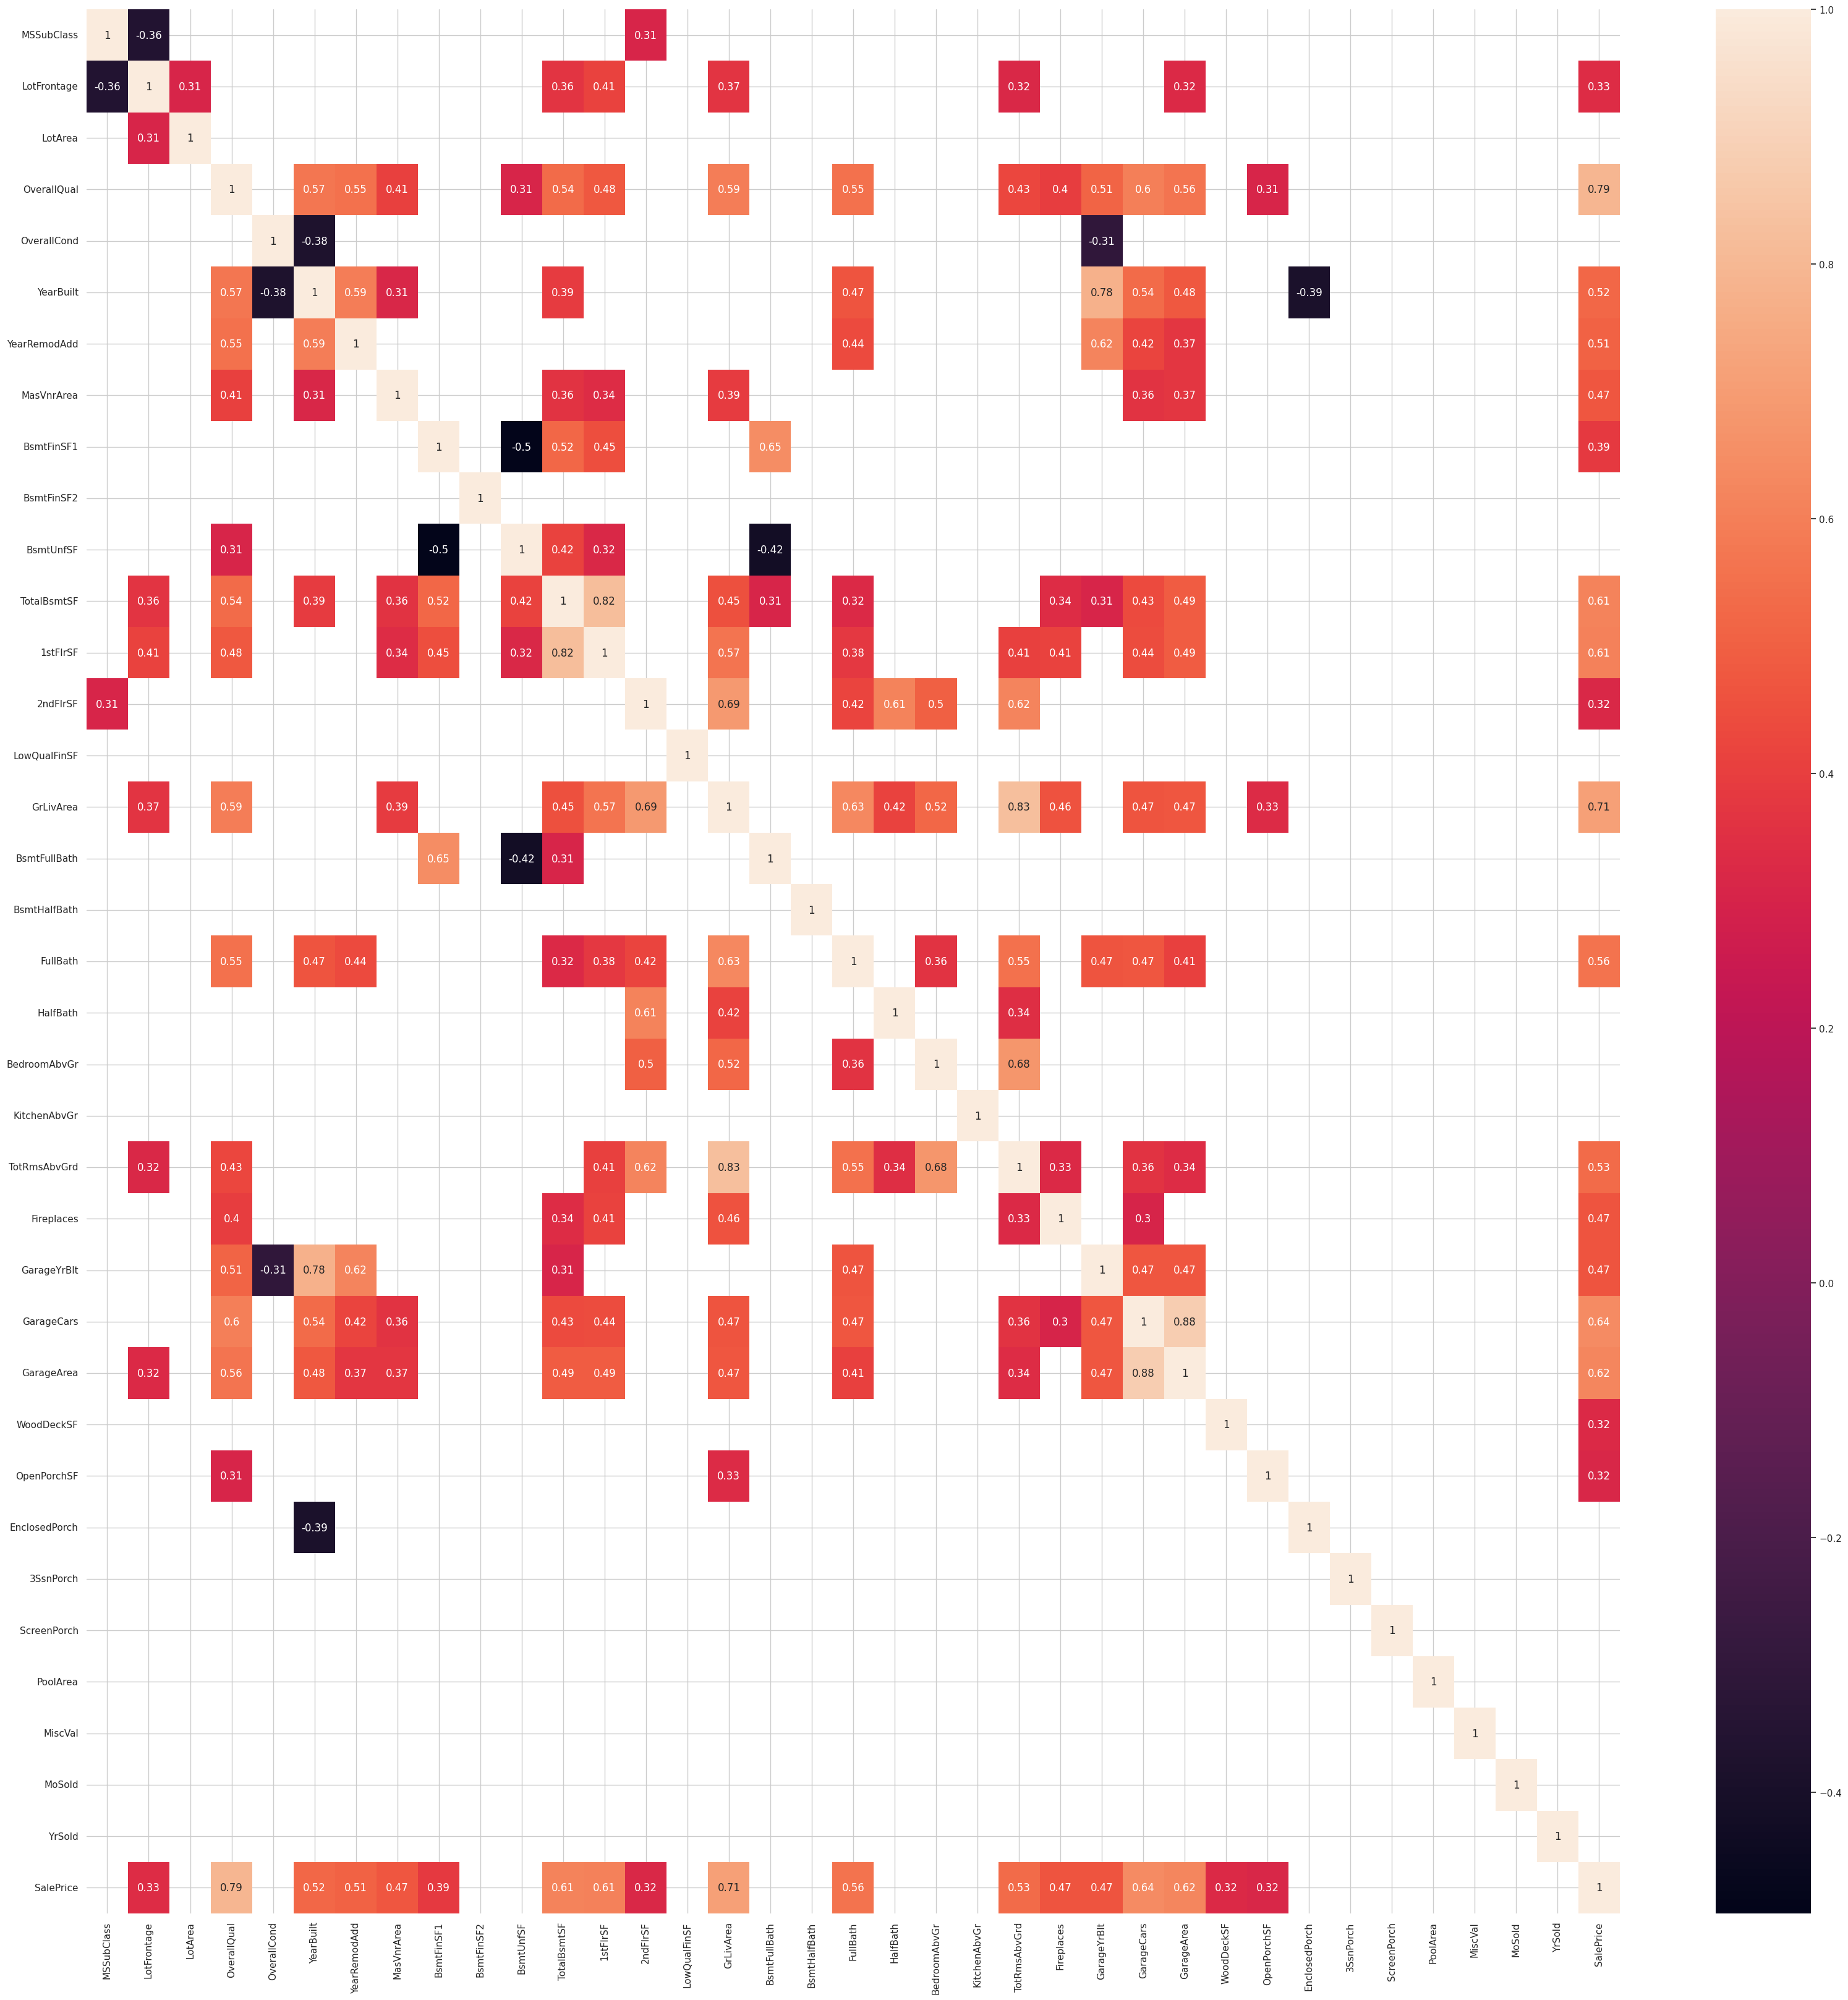

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(40,40))
sns.heatmap(corr_num[(corr_num>=.3) | (corr_num<=-.3)], annot=True)
plt.show()

In [19]:
# from scipy.stats import pearsonr


# def coef_pvalue(df, features, target):
#     for feature in features:
#         corr, p_value = pearsonr(df[feature], df[target])
#         print(f"{feature}:\nCoef: {corr}\nP_value: {p_value}")
#         print()
        
        
# features = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea"]   
# target = "SalePrice"
# coef_pvalue(corr_num, features, target)

In [20]:
# FINDING OUTLIERS
#     sns.set(style="whitegrid")
#     sns.boxplot(df_hnum_s[features])
#     plt.xticks(rotation="vertical")
#     plt.show()

In [21]:
pd.set_option("display.max_rows", 10)

# Handling outliers

In [22]:
# Winsorization of .05

from scipy.stats.mstats import winsorize

def winsorizer(df, limit=(.05, .05)):
    df_w = pd.DataFrame()
    for col in df.columns:
        winsorized_data = pd.Series(winsorize(df[col], limits=limit))
        winsorized_data.name = col
        df_w = pd.concat([df_w, winsorized_data], axis=1)
    return df_w


In [23]:
df_hnum_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   OverallQual    1460 non-null   float64
 4   OverallCond    1460 non-null   float64
 5   YearBuilt      1460 non-null   float64
 6   YearRemodAdd   1460 non-null   float64
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   float64
 9   BsmtFinSF2     1460 non-null   float64
 10  BsmtUnfSF      1460 non-null   float64
 11  TotalBsmtSF    1460 non-null   float64
 12  1stFlrSF       1460 non-null   float64
 13  2ndFlrSF       1460 non-null   float64
 14  LowQualFinSF   1460 non-null   float64
 15  GrLivArea      1460 non-null   float64
 16  BsmtFullBath   1460 non-null   float64
 17  BsmtHalfBath   1460 non-null   float64
 18  FullBath

In [24]:
# Applying the function
df_w = winsorizer(df_hnum_s, limit=(.01, .01))

In [25]:
# # FINDING OUTLIERS after winsorization
# for i in range(0, df_w.shape[1], 5):
#     sns.set(style="whitegrid")
#     sns.boxplot(df_w.iloc[:, i:i+5])
#     plt.xticks(rotation="vertical")
#     plt.show()

In [26]:
df_w.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [27]:
# SCATTER PLOTS TO UNDERSTAND IF THE RELATIONSHIP IS LINEAR OR NOT
# for feature in df_w.columns[1:-1]: # Not including the ID and SalePrice
   
#     fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
#     sns.regplot(x=df_hnum_s[feature], y=df_hnum_s["SalePrice"], ax=axs[0], line_kws={'color': 'red', 'label': "Regression Line"})
#     axs[0].legend()
#     axs[0].set_title(f"With Outliers: {feature} vs SalePrice")
    
#     sns.regplot(x=df_w[feature], y=df_w["SalePrice"], ax=axs[1], line_kws={'color': 'red', 'label': "Regression Line"})
#     axs[1].set_title(f"Without Outliers: {feature} vs SalePrice")
    
#     plt.show()

# Linear or Non-Linear

In [28]:
# fig, axs = plt.subplots(1,2, figsize=(10, 5))

# sns.regplot(x="OverallQual", y="SalePrice", data=df_hnum_s, order=3, ax=axs[0], line_kws={'color': 'green', 'label':"Cubic Fit"})
# sns.regplot(x="OverallQual", y="SalePrice", data=df_hnum_s, ax=axs[0], line_kws={'color': 'red', 'label': "Regression line"})
# axs[0].set_title("With Outliers: OverallQual vs SalePrice")
# axs[0].legend()

# sns.regplot(x="OverallQual", y="SalePrice", data=df_w2, order=3, ax=axs[1], line_kws={'color': 'green', 'label':"Cubic Fit"})
# sns.regplot(x="OverallQual", y="SalePrice", data=df_w2, ax=axs[1], line_kws={'color': 'red', 'label': "Regression line"})
# axs[1].set_title("Without Outliers: OverallQual vs SalePrice")
# axs[1].legend()

# plt.show()

# Visualizing to understand what polynomial degree captures each feature better

In [29]:
# import warnings
# warnings.filterwarnings('ignore')

# for feature in df_w.columns[df_w.columns != "SalePrice"]:
#     fig, axs = plt.subplots(1, 2, figsize=(12, 5))
#     sns.regplot(x=feature, y="SalePrice", data=df_hnum_s, ax=axs[0], order=3, line_kws={'color': 'green', 'label':"Cubic" })
#     sns.regplot(x=feature, y="SalePrice", data=df_hnum_s, ax=axs[0],line_kws={'color': 'red', 'label': "Regression line"})
#     axs[0].legend()
#     axs[0].set_title(f"With Outliers: {feature} vs SalePrice")

#     sns.regplot(x=feature, y="SalePrice", data=df_w, ax=axs[1], order=2, line_kws={'color': 'blue', 'label':"Quadratic"})
#     sns.regplot(x=feature, y="SalePrice", data=df_w, ax=axs[1], order=3, line_kws={'color': 'gray', 'label':"Cubic"})
# #     sns.regplot(x=feature, y="SalePrice", data=df_w, ax=axs[1], order=4, line_kws={'color': 'green', 'label':"4th"})
#     sns.regplot(x=feature, y="SalePrice", data=df_w, ax=axs[1], line_kws={'color': 'red', 'label': "Regression line"})
#     axs[1].legend()
#     axs[1].set_title(f"Without Outliers: {feature} vs SalePrice")

#     plt.show()

In [30]:
df_w.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [31]:
df_w = df_w.drop(columns = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', "MSSubClass"],axis=1)

df_w["TotArea"] = df_w[["GrLivArea","1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]].sum(axis=1)
df_w["Avgqual"] = df_w[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea"]].mean(axis=1)

df_w["SquareFrontage"] = df_w["GrLivArea"] + df_w["TotalBsmtSF"] + df_w["GarageArea"]
df_w["QualCond"] = df_w["OverallQual"] * df_w["OverallCond"]
df_w["Age_Sold"] = df_w["YrSold"] - df_w["YearBuilt"]
df_w["Remod_bef_Sold"] = df_w["YrSold"] - df_w["YearRemodAdd"]
df_w["Bath_per_Bed"] = df_w["FullBath"] / df_w["BedroomAbvGr"]
df_w["Garage_age"] = df_w["YrSold"] - df_w["GarageYrBlt"]

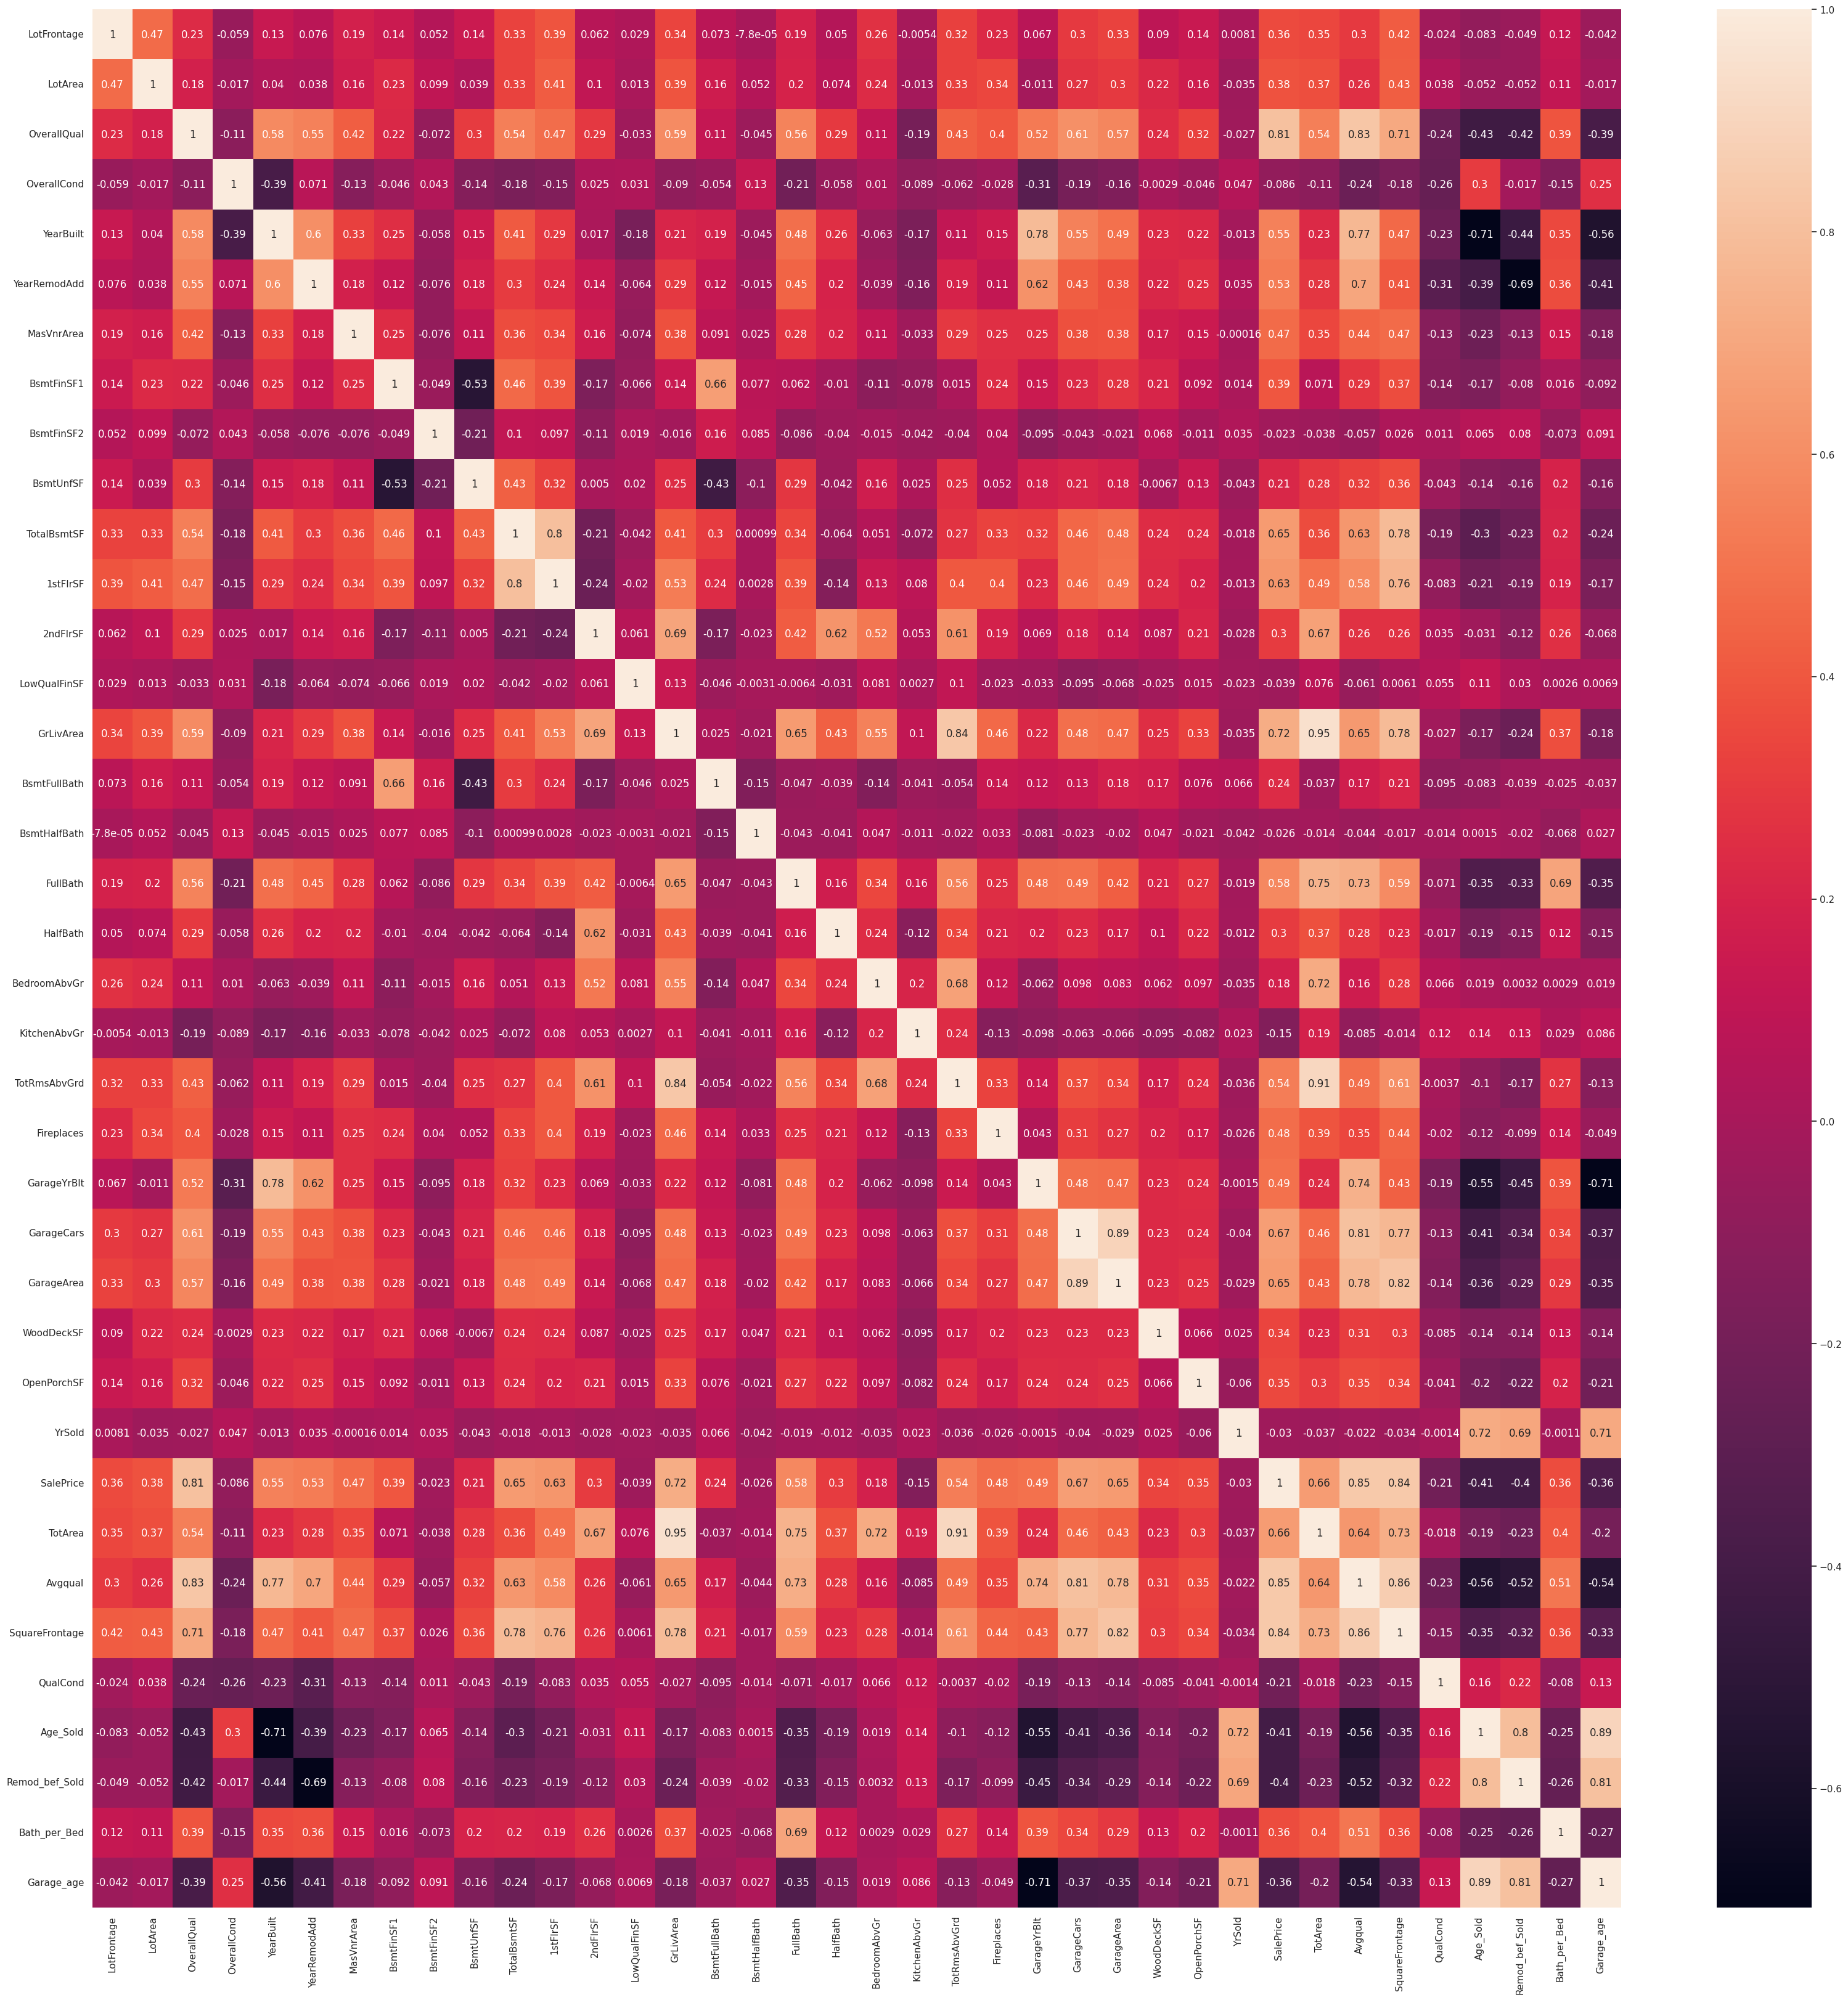

In [32]:
# Visualizing correlation with outliers winsorized 
plt.figure(figsize=(40, 40))
sns.heatmap(df_w.corr(),annot=True)
plt.show()

# Linear Regression Model

In [33]:
# Split the data for train, test to .8 and .2 respectively
from sklearn.model_selection import train_test_split

X = df_w.loc[:, df_w.columns != "SalePrice"].values
y = house.SalePrice.values.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=11)

In [34]:
# Base Model
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(random_state=11, shuffle=True)

sgdr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(random_state=11)

In [35]:
print(f"Coefficients: {sgdr.coef_}\n")
print(f"Intercept: {sgdr.intercept_}")

Coefficients: [  2078.70549588   9351.55704519  19306.73753984   7343.85216584
   3949.82150269   2449.31389001   4550.34218604   2750.7745969
  -1915.33720427  -4001.80110272   3847.05193453   -151.34459868
  -1818.41352606  -2643.63398977  10917.89097678    149.93779608
  -1652.65047729   2005.56237309    301.31779332 -13844.56567644
  -5296.11858858   4255.30502795   1013.80597409   3242.15252147
   2132.32591937  -6543.20559398   1514.75497893   -936.99763031
   2590.21091188   1364.43457664   4589.73900709   8221.73731733
   1881.92776047  -1359.61059081    140.89702188  -2219.50134787
   -651.94160959]

Intercept: [182289.97464261]


In [36]:
# Make predictions
y_pred = sgdr.predict(X_test)

In [37]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# print(mean_absolute_error(y_test, y_pred))

In [38]:
print(house.SalePrice.max()-house.SalePrice.min())

720100


In [39]:
diff = y_test-y_pred
# sns.histplot(diff, bins=25, legend=False)
# plt.show()

In [40]:
# Cross Validation using K-Fold
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X[train_index], X[test_index]
    y_train_k, y_test_k = y[train_index], y[test_index]
    
    sgdr.fit(X_train_k, y_train_k)
    predictions = sgdr.predict(X_test_k)
    score = mean_absolute_error(y_test_k, predictions)
    scores.append(score)
    
    
average_score = np.mean(scores)
print(f"Average Accuracy: {average_score:.2f}")

Average Accuracy: 21643.97


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

# Submission

In [41]:
test = pd.read_csv(r"/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [42]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [43]:
test_num = test.select_dtypes("number")
test_obj = test.select_dtypes("object")

In [44]:
test_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [45]:
pd.set_option("display.max_rows", 20)
test_na_cols = test_num.columns[test_num.isna().sum()>0]
test_num[test_na_cols].isna().sum()


LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [46]:
test_num["GarageYrBlt"] = test_num["GarageYrBlt"].fillna(test_num["GarageYrBlt"].median())
test_num["MasVnrArea"] = test_num["MasVnrArea"].fillna(test_num["MasVnrArea"].median())
test_num["LotFrontage"] = test_num["LotFrontage"].fillna(test_num["LotFrontage"].mean())

In [47]:
test_num = test_num.fillna(test_num.median())

In [48]:
test_num_s = scaler.fit_transform(test_num.iloc[:, 1:])
testnum_df = pd.DataFrame(test_num_s, columns=test_num.columns[test_num.columns != "Id"])

In [49]:
testnum_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.874711,0.555587,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,-0.650461,-0.370716,-0.654561,-0.775254,-0.080483,-1.215588,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,-0.653107,-0.988189,1.185921,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905
1,-0.874711,0.604239,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,-0.339225,0.639230,0.433298,-0.775254,-0.080483,-0.323539,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.20391,-0.255371,-0.898055,-0.769806,-0.988189,-0.741235,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905
2,0.061351,0.263676,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,-0.954831,-0.266784,-0.574165,0.891944,-0.080483,0.294508,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,-0.255371,0.647066,0.747276,0.301406,0.042537,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905
3,0.061351,0.458284,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,-0.526882,-0.271303,-0.579190,0.837243,-0.080483,0.243004,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,0.407593,0.647066,0.786176,0.301406,-0.012788,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905
4,1.465443,-1.244533,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,1.059048,0.528520,0.310192,-0.775254,-0.080483,-0.424487,-0.818068,-0.25816,0.773083,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,0.552779,0.301406,0.153187,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905


In [50]:
test_w = winsorizer(testnum_df, limit=(.01, .01))

In [51]:
test_w = test_w.drop(columns = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', "MSSubClass"],axis=1)

test_w["TotArea"] = test_w[["GrLivArea","1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]].sum(axis=1)
test_w["Avgqual"] = test_w[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea"]].mean(axis=1)

test_w["SquareFrontage"] = test_w["GrLivArea"] + test_w["TotalBsmtSF"] + test_w["GarageArea"]
test_w["QualCond"] = test_w["OverallQual"] * test_w["OverallCond"]
test_w["Age_Sold"] = test_w["YrSold"] - test_w["YearBuilt"]
test_w["Remod_bef_Sold"] = test_w["YrSold"] - test_w["YearRemodAdd"]
test_w["Bath_per_Bed"] = test_w["FullBath"] / test_w["BedroomAbvGr"]
test_w["Garage_age"] = test_w["YrSold"] - test_w["GarageYrBlt"]

In [52]:
test_w.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,TotArea,Avgqual,SquareFrontage,QualCond,Age_Sold,Remod_bef_Sold,Bath_per_Bed,Garage_age
0,0.555587,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,-0.650461,-0.370716,-0.654561,-0.775254,-0.080483,-1.215588,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,-0.653107,-0.988189,1.185921,0.366678,-0.701628,1.713905,-5.622000,-0.581703,-0.400383,-0.301016,2.054850,2.786790,0.999201,2.367012
1,0.604239,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,-0.339225,0.639230,0.433298,-0.775254,-0.080483,-0.323539,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.20391,-0.255371,-0.898055,-0.769806,-0.988189,-0.741235,2.347867,-0.178826,1.713905,-1.773588,-0.546860,-0.425544,-0.021993,2.153600,2.928814,-5.845090,2.483711
2,0.263676,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,-0.954831,-0.266784,-0.574165,0.891944,-0.080483,0.294508,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,-0.255371,0.647066,0.747276,0.301406,0.042537,0.930495,-0.207871,1.713905,1.305997,0.295970,0.070260,0.373611,0.869846,1.035163,4.392589,0.966629
3,0.458284,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,-0.526882,-0.271303,-0.579190,0.837243,-0.080483,0.243004,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,0.407593,0.647066,0.786176,0.301406,-0.012788,2.089451,-0.178826,1.713905,1.857731,0.368935,-0.041088,-0.021993,0.836930,1.035163,4.392589,0.927729
4,-1.244533,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,1.059048,0.528520,0.310192,-0.775254,-0.080483,-0.424487,-0.818068,-0.25816,0.773083,-0.751040,-1.029543,-0.20391,-0.918335,-0.898055,0.552779,0.301406,0.153187,-0.729632,0.489198,1.713905,-2.064343,0.477359,0.257220,-0.665332,1.034430,1.319211,-0.750900,1.161127


In [53]:
test_X = test_w.values

In [54]:
predictions_s = sgdr.predict(test_X)

In [55]:
predictions_s.shape

(1459,)

In [56]:
id_df = test["Id"]
preds = pd.Series(predictions_s, name="SalePrice")
submission = pd.concat([id_df, preds], axis=1)

In [57]:
submission.isna().sum()

Id           0
SalePrice    0
dtype: int64

In [58]:
submission.to_csv("submission.csv", index=False)

In [59]:
sample = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [60]:
submission.shape

(1459, 2)

In [61]:
sample.shape

(1459, 2)